# **Add Importings**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io, color, feature, exposure,transform
import os
import pandas as pd
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import cv2

# **Functions To Extract Features and Labels**

In [35]:
def extract_label(image_name):
    # Extract the label from the image name
    parts = image_name.split('-')

    if len(parts) > 1:
        first_word = parts[0].lower()
        if first_word in ["bad", "good"]:
            label = first_word
        else:
            label = None
    else:
        label = None

    return label

def load_and_preprocess_images(images_path):
    features = []
    labels = []
    
    class_mapping = {'bad': 0, 'good': 1}
    
    for img in os.listdir(images_path):
        label = extract_label(img)

        if label not in class_mapping:
            continue

        class_label = class_mapping[label]

        image = io.imread(os.path.join(images_path, img))

        resized_image = transform.resize(image, (128, 128), mode='reflect')

        # Calculate the center coordinates of the resized image
        center_y, center_x = np.array(resized_image.shape[:2]) // 2

        # Define the cropping box dimensions (adjust as needed)
        crop_size = 100
        crop_x_start = center_x - crop_size // 2
        crop_x_end = center_x + crop_size // 2
        crop_y_start = center_y - crop_size // 2
        crop_y_end = center_y + crop_size // 2

        # Crop the resized image
        cropped_image = resized_image[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

        # Calculate HOG features
        hog_features = feature.hog(
            cropped_image,
            block_norm='L2-Hys',
            pixels_per_cell=(8, 8),
            channel_axis=-1
        )

    # Display the original image and the HOG features for first 10 photos

        features.append(hog_features)

        labels.append(class_label)

    return np.array(features), np.array(labels)


# **Creating The Dataframes**

In [36]:
# Set the path to your image data
val_data_path = '/kaggle/input/tomato-detect/val/images'
X_val, y_val = load_and_preprocess_images(val_data_path)

In [37]:
df_fv = pd.DataFrame(X_val)

In [38]:
df_lv = pd.DataFrame(y_val)

In [39]:
# Set the path to your image data
tes_data_path = '/kaggle/input/tomato-detect/test/images'
X_tes,y_tes = load_and_preprocess_images(tes_data_path)

In [40]:
df_ftes = pd.DataFrame(X_tes)

In [41]:
df_ltes = pd.DataFrame(y_tes)

In [42]:
df_f = pd.concat([df_fv,df_ftes], axis=0)
df_l = pd.concat([df_lv,df_ltes], axis=0)

In [43]:
df_f

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.067534,0.000000,0.000000,0.000000,0.047986,0.037669,0.216330,0.245008,0.104958,0.255317,...,0.053746,0.021004,0.003222,0.007892,0.011026,0.037560,0.059436,0.024793,0.021230,0.050232
1,0.031231,0.035779,0.025475,0.026291,0.011866,0.002837,0.002671,0.005035,0.001667,0.065888,...,0.058326,0.043232,0.048148,0.007918,0.005748,0.000000,0.007813,0.009483,0.016279,0.028602
2,0.042267,0.033363,0.008007,0.046982,0.265582,0.005542,0.007026,0.003375,0.032448,0.399106,...,0.116619,0.023342,0.133345,0.111274,0.105033,0.024690,0.010140,0.007859,0.005046,0.011341
3,0.039685,0.065190,0.023315,0.003463,0.018931,0.003860,0.000364,0.002381,0.013209,0.036113,...,0.036093,0.081110,0.363323,0.007873,0.002227,0.001793,0.003520,0.009911,0.014406,0.033176
4,0.371006,0.066370,0.000000,0.000000,0.003679,0.000000,0.000000,0.000000,0.079343,0.029345,...,0.012462,0.042125,0.017024,0.025539,0.017032,0.200252,0.229233,0.143781,0.137956,0.105301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.288900,0.050274,0.011314,0.047291,0.288900,0.245817,0.019807,0.007234,0.065951,0.288900,...,0.000000,0.006505,0.000000,0.182706,0.070359,0.054896,0.028550,0.040501,0.263937,0.092938
197,0.042420,0.029053,0.364692,0.076771,0.098947,0.012725,0.000000,0.000000,0.018729,0.083717,...,0.190394,0.019070,0.028408,0.020122,0.023875,0.031672,0.000000,0.021678,0.007541,0.028915
198,0.013300,0.033324,0.136727,0.117756,0.082055,0.018691,0.006524,0.010498,0.001258,0.016304,...,0.033083,0.003238,0.000000,0.011019,0.000000,0.300919,0.300919,0.038271,0.000000,0.000000
199,0.028578,0.000000,0.012394,0.066056,0.205063,0.237611,0.089318,0.003920,0.000000,0.086336,...,0.017286,0.146914,0.016831,0.029662,0.017451,0.000000,0.001577,0.063212,0.270666,0.423516


In [44]:
df_l

,0
0,1
1,1
2,0
3,1
4,1
...,...
196,0
197,0
198,0
199,1


# **Splitting The Dataframes**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_f.values, df_l.values, test_size=0.20,stratify=df_l.values,random_state=100)

y_train = y_train.ravel()
y_test = y_test.ravel()

# **Standardizing The Data**

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Train The Model**

In [47]:
model = LogisticRegression(C=0.001,max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(C=0.001, max_iter=1000)

# **Test Accuracy**

In [48]:
from sklearn.metrics import accuracy_score

# Evaluate performance
test_accuracy = round(accuracy_score(y_test, model.predict(X_test_scaled))*100,2)

print(f'Test Accuracy: {test_accuracy}%')

Test Accuracy: 85.48%


# **Trying The LogisticRegressionCV**

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
modelCV = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42, n_jobs=-1)
modelCV.fit(X_train_scaled, y_train)

# Evaluate performance
test_accuracy = round(accuracy_score(y_test, modelCV.predict(X_test_scaled))*100,2)

print(f'Test Accuracy: {test_accuracy}%')

Test Accuracy: 85.48%


In [53]:
modelCV.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

# **Plotting the Cost Curve**

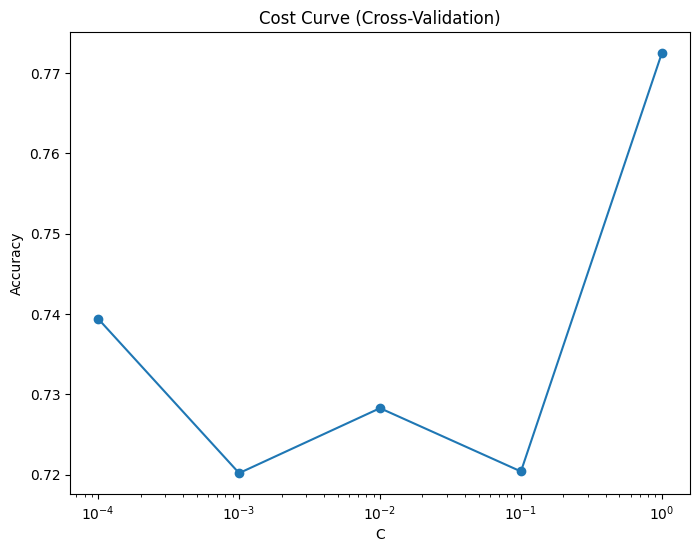

In [54]:
C_values = 10.0**np.arange(-4, 4)

mean_scores = -np.mean(list(modelCV.scores_.values()), axis=(0, 2))

plt.figure(figsize=(8, 6))

plt.plot(C_values[:len(mean_scores)], -mean_scores, marker='o')

plt.xscale('log')

plt.title('Cost Curve (Cross-Validation)')

plt.xlabel('C')

plt.ylabel('Accuracy')

plt.show()

# **Plotting The Confusion Matrix**

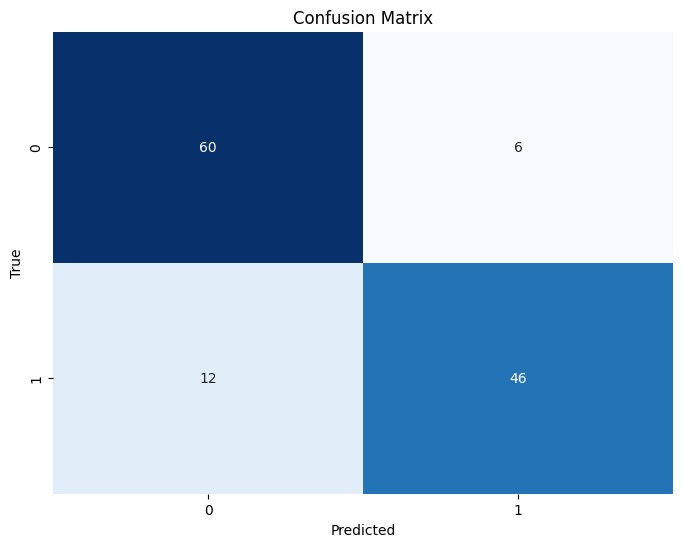

In [58]:
from sklearn.metrics import confusion_matrix, roc_curve, auc,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]



# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Plotting ROC Curve**

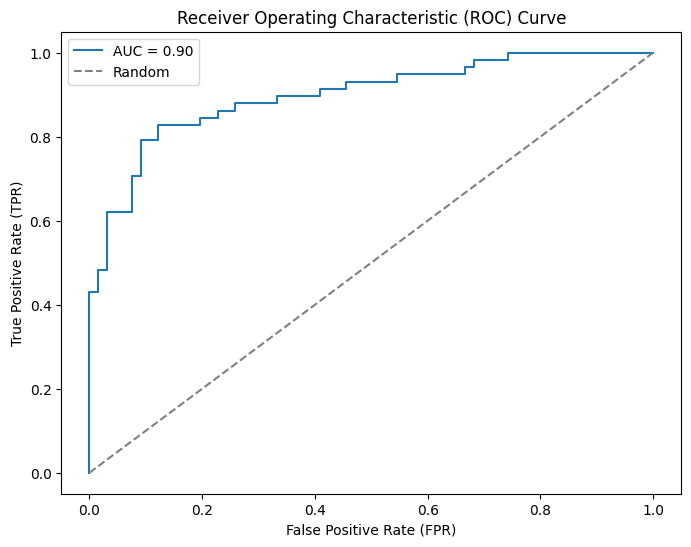

In [60]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        66
           1       0.88      0.79      0.84        58

    accuracy                           0.85       124
   macro avg       0.86      0.85      0.85       124
weighted avg       0.86      0.85      0.85       124



In [103]:
from sklearn.cluster import KMeans

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(df_f)

KMeans(n_clusters=2, n_init=10, random_state=42)

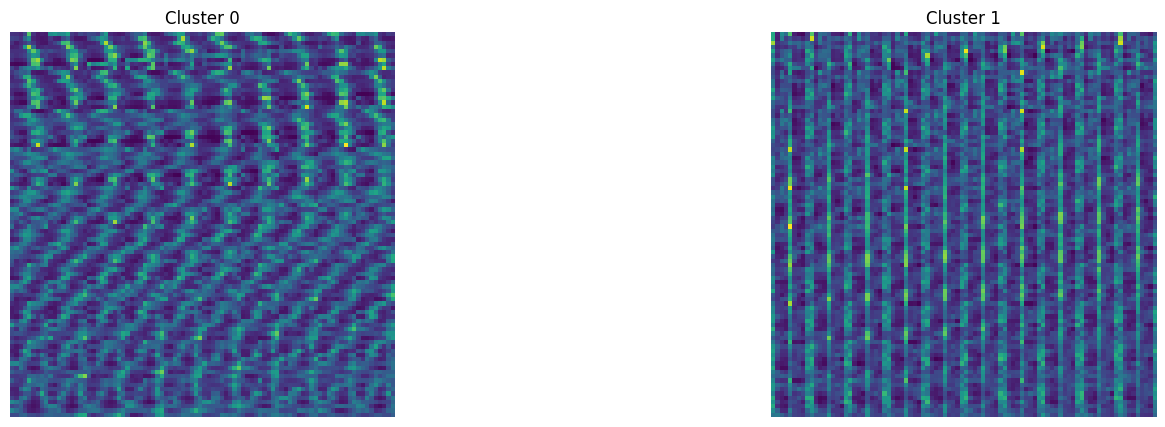

In [104]:
# Plot cluster centers
fig, ax = plt.subplots(1, n_clusters, figsize=(18, 5))

for i in range(n_clusters):
    center_image = kmeans.cluster_centers_[i].reshape((90, 90))
    ax[i].imshow(center_image)
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()

Silhouette Score: 0.037276306088860914


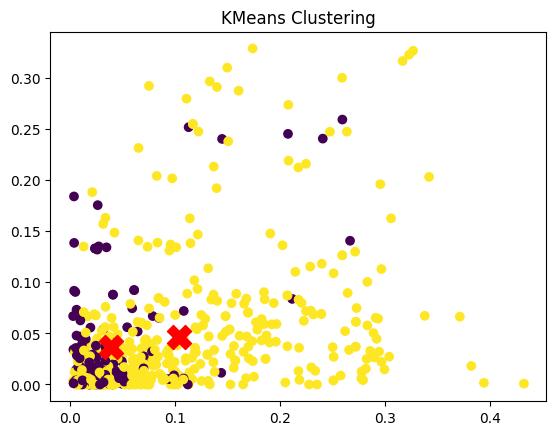

In [95]:
from sklearn.metrics import silhouette_score
# Silhouette analysis
silhouette_avg = silhouette_score(df_f.values, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters
plt.scatter(df_f.values[:, 0], df_f.values[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('KMeans Clustering')
plt.show()

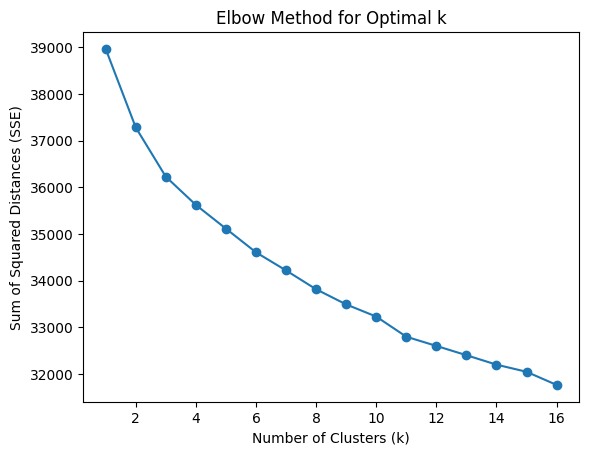

In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 17)

sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
    kmeans.fit(df_f)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()
